# Modeling Economical Systems

<img src="https://media.makeameme.org/created/kjp-hyt-selg.jpg" width=500>

###  🔬Groupname:

#### 🔬 Group members:

## Goals of this assignment:
 * Create two or more economic systems and compare them
 * How to use different plotting tools to visualize data
 * Learn how to use the Lorenz curve and the GINI coefficient to explain the distribution of wealth within economic systems and compare them

## Introduction and motivation
In this assignment we will try to recreate an economic system using Agent Based Modeling, this economic system will be based on the yard sale model developed by the phycicist Anirban Chakraborti. The system works by assuming that wealth transfers from one person to another by overpaying or underpaying for the traded good.

Imagine that you are buying a toaster from someone at a yardsale, you pay 100 NOK ($\approx$11 USD) for it, however the toasters "real" value is 120 NOK ($\approx$13.5 USD), which means that in a way you have the potential to earn more money by selling it at its actual market price. So value has transfered to you because you underpaid for an item. The seller however has just lost a bit of value since they sold it at under market price, and this is how the model bases its value transfer, by either over or underpaying for items. 

Chakraborti also assumed that the people trading would only trade a relative portion of their wealth since no one or very few people wishes to declare bankruptcy. What he found however was that even when the winner was decided through a model as simple as a coinflip money tended to coalesce to one agent. So in effect this created a system where one person would become an oligarch. That is what we shall try to model in this exercise, we shall also try to modify the system to see if we can curtail the growth of the oligarchs and try to make a system where the wealth flows between the agents and not simply into one. 

---


The motivation behind this exercise is that in a world where computers and models are becoming evermore powerful there will one day come a time where people can model a society and try to use the results of that model to improve our very much real world. This technology will eventually let us try different societal structures adn policies to test them without harming any people, in recent history many different political theories on how societies should best be run have sprung up and we all live in the wake of the trial and error of some of them. This technology however of modeling economy, society and much more will allow us to circumvent this and perhaps try out more and more models to learn from them and try to impliment what we learn from them.  

An example of this would be this article where they used machine learning to determine the best tax policy for a system https://blog.einstein.ai/the-ai-economist/ , this article is not needed to understand and complete this assignment, but feel free to read it if you are interested as an example.




---

### Importing the necessary libraries


For this excercise we will need to plot the results so we can interprit our system much easier, a good library when it comes to plotting would be matplotlib.pyplot. We also need to work with a lot of data so implementing numpy for its functions and array structures is also encouraged heavily. The last package we also view as necessary for this excercise is random, we are going to be using a coinflip model to determine who actually wins the trade, and for this the pack random comes in very handy.

Note though that matplotlib.pyplot has been implimented as plt and numpy as np.


In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import random

## Agent based modeling

So we have mentioned the term agent based modeling (ABM), but what is an agent based model? Well to put it simply, and agent based model is a model where you have a set of autonomous agents who interact with eachother and potentially with a system over a number of iterations. It is done to try and get an understanding of how the system behaves and is mostly built up around the rules set for the agents by the creator. The agents can in effect be anything, in our exercise they can be either people or corporations all trying to become the richest and "win".

ABM is also a way of trying to model smaller parts of a system, for example here we will model how a small and rudimentary economic system works. But as we will come to understand the method is quite robust and it is easy to do modifications to the system and make it more complex. As wikipedia states


        ""Agent-based models are a kind of microscale model that simulate the simultaneous operations and interactions of multiple agents in an attempt to re-create and predict the appearance of complex phenomena.""
        
And as we shall come to understand ABM is a powerful tool which can be used to model more than many can imagine.

## Lorenz curve and the GINI coefficient

When trying to analyze wealth distribution Lorenz curves are a great tool. It gives a graphical representation og the wealth distribution and can easily be used to calculate the GINI coeficcient which estimates how far from a totally equal wealth distribution a country is. This is done by plotting the percentage of people against the percentage of wealth or any other asset in the country. 



The GINI coefficient is defined from the Lorenz curve. A 45 degree line represents perfect income equality in the population, and so the GINI coefficient can be interpreted as the ratio of the between the area A and the total area A+B:

GINI = A / (A+B)




Your job later on will be to plot the Lorenz curve and calculate the GINI coeficcient for your system.



Take a look at this video from Khan Academy for a better understanding:


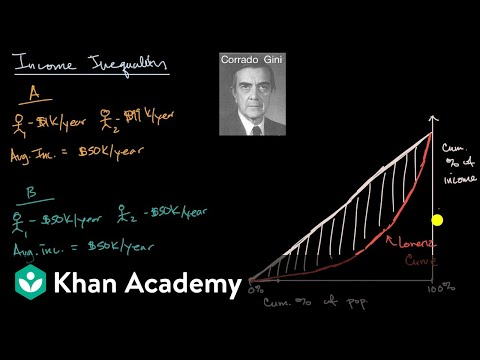

In [2]:
from IPython.display import YouTubeVideo 
YouTubeVideo("y8y-gaNbe4U",width=640,height=360)

Below is the functions which calucalte the GINI coeficcient from the lorenz curve.

Remember: When using the gini and lorez functions the list or array you input has to be sorted small to large.

In [3]:
def gini(matrix):
    count = matrix.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * matrix).sum()
    total = matrix.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(matrix):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = matrix.cumsum() / matrix.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)


## The coinflip function

So what are we trying to replicate with this function? Well more or less a coinflip, while we probably could develop a model for skill-development and its impact on winning this is not strictly necessary. A simplified system where each has a 50/50 chance of winning is sufficient, this also has the added benefit of allowing us to remove skill completely as a factor and study to what effect the system and its rules impact the outcome and not the individual agents. 


The coinflip function will be an essential part of the systems we create, it should take no arguments, its purpose is to return either true or false at a near 50/50 rate. There are many ways of making this function, one way of doing it would be to use the function random.choice(), where you insert the bools True and False as a single list, however if you can think of another way we encourage you to try it!

If interested you can also take a look at the documentation for random.choice()

Link: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

### 🔬 Task: Make the coinflip function and see how the distribution is with a nested for loop that iterates over the following number of iterations, [4,8,100,1000].

In [4]:
# Write the coinflip function here

def flipCoin():
    # the function should return either True or False
    return random.choice([True,False])



# Here you should write the code for testing the distribution over the given number of iterations
iter_list = [4,8,100,1000]
for j in iter_list:
    check = [0,0]
    for i in range(j):
        if flipCoin() == True:
            check[0] +=1
        else:
            check[1] +=1
    print("The function with {:.0f}".format(j) + " iterations got True {:.1f}".format(check[0]/sum(check) * 100) +
          "% of the time and False {:.1f}".format(check[1]/sum(check) * 100) + "% of the time")

The function with 4 iterations got True 25.0% of the time and False 75.0% of the time
The function with 8 iterations got True 37.5% of the time and False 62.5% of the time
The function with 100 iterations got True 52.0% of the time and False 48.0% of the time
The function with 1000 iterations got True 48.8% of the time and False 51.2% of the time


### 🔬 Task: Write how the distribution was for the lower iterations and the higher number of iterations, do you see a pattern?

As we can see the coinflip function does not guarantee that if you first got heads then you will get tails afterwards. However as the number of throws go to infinity then the distribution should get closer to a 50/50 distribution. In this excercise we call the event where you get a large number of either True or False as a **statistical anomaly**, although it is not an anomaly, we call it this so we can use the term later. 

---

## First version of the tradingcode

Now that the coinflip function is set we should try making the very first iteration of our trading code, this will then be the foundation for the rest of the exercise.

First we need to initialize our system, we need to have a initial capital for our agents IE the amount of money they each start with. Then we need the number of agents and the iterations the trade will iterate over. Further if we are extra curious we can check how many times they won over the set of iterations and who came out on top after the final iteration. However the last point is only needed if you run the iteration multiple times in a for-loop, you can do this if you are curious as to how the distribution of wins over many standalone runs are, but this is not necessary, yet we encourage you to do it!

---

### 🔬 Task: initiate the system

 ##### So to itemize we need:
 * Number of iterations
 * Starting value for the agents
 * Number of agents
 * The matrix in where we store our agents values
 * To fill the matrix with the inital capital for the two agents

In [5]:
#initialization

N = 5000
sKapital = 100000
agents = 2



# Setting up the matrix that holds the values
people = np.zeros((N,agents))
people[:] = np.NaN

# Filling it with the start values which our agents will trade with
people[0,:] = np.array([sKapital,sKapital])
systemwealth = np.sum(people[0,:])



### Making the system
So now that we have the basis for our system ready its time to make the system, it will consist of a for loop with some conditions, first we need to check who has the least wealth as he will determine how much money they will trade with. The reason for this is based in reality, if two people wit unequal wealth bet, then the person with the least value will want to bet a small portion relative to his wealth. While the rich person owns more and can bet larger sums he will never get the poorer person to bet these amounts because they can be large portions of his wealth. Therefore the person with the least amount of money will decide the value being transfered.

#### Who does it favour?
Moreover the wager also has to be favourable to the poor person, or else he would never accept the trade, he has to try and gain something so when the poor person wins he should get more wealth than what he has to give up when he loses. These amounts should be so that when he wins, he gets 0.2 of his own wealth and when he loses he has to give up 0.17 of his own wealth. 

Further if they have an equal amount of wealth then it makes no difference who has the more wealth and who does not, and since they have an equal amount of money they should wager the same amount either when they lose or win.

#### Early termination factor ( Extra)
So when these conditions are done the system should more or less be ready, for those who want you can add a termination factor, when one of the agents has a large percentage of the systemwealth then the loop should terminate. The different portions of the systemwealth you can try is **90% , 95% and 99%,** see how long time it takes for a small number of systemruns to reach this point.


#### What to do
 * Make an if statement checking the wealth and deciding whos wealth to base the bets on
 * Call the coinflip function to see who won
 * Update the next wealth based on the results from the two first bulletpoints


In [6]:
# The first trade system

for i in range(N-1): #Dette er selve traden
    """
    Her sjekker vi om noen har vunnet, dersom en person vinner så legger vi til 1 på antall ganger vunnet,
    hvor mange ganger de har vunnet printes helt til slutt, vi antar at antall wins for begge to skal være relativt lik.

    """
    if people[i,0] >= 0.90*systemwealth:
        break
    elif people[i,1] >= 0.90*systemwealth:
        break


    #checking who has more wealth, the agent with least wealth becomes the basis for calculating loss or win.
    if people[i,0] < people[i,1]:
        w = people[i,0] # amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[i,0] > people[i,1]:
        w = people[i,1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[i,1]
        rich = 2
        normal = 1

    firstwins = flipCoin() # Returns who wins

    #normal wins
    if rich != 2 and (firstwins == True):
        people[i+1,normal] = people[i,normal] + 0.2 * w #loser
        people[i+1,rich] = people[i,rich] - 0.2 * w #winner



        #normal loses
    elif rich != 2 and (firstwins== False): 
        people[i+1,normal] = people[i,normal] - 0.2 * w #loser
        people[i+1,rich] = people[i,rich] + 0.2 * w #winner

        #they are equal, so no-one is rich or poor, but someone has to win.
    elif rich == 2 and (firstwins == True):
        people[i+1,0] = people[i,0] - 0.2 * w 
        people[i+1,1] = people[i,1] + 0.2 * w 

    elif rich == 2 and (firstwins == False):
        people[i+1,1] = people[i,1] - 0.2 * w 
        people[i+1,0] = people[i,0] + 0.2 * w 



    


### 🔬 Task: Visualizing the results from the two agent trade
Now that we have out system all that remains is visualizing it so we can see who won and who lost, aswell as how the value developed over the iterations, we assume from our model that the person who won at the start would be the over all winner. But this does not necessarily mean that this person should always win, statistical anomalies like when one person wins a large number of times can tip the balance of power in such a way that the poor person makes a comeback.

Moreover when the difference in agent wealth is small it only takes a small statistical anomaly to make a large change in the system. So plot the development of the values next to each other and explain what has happened. Who won, did it go as you expected, can you spot any statistical anomalies and if you added in the win condition, when did one of the agents win? 

Text(0.5, 1.0, 'Plot of the wealth development of the two agents as a function of iterations')

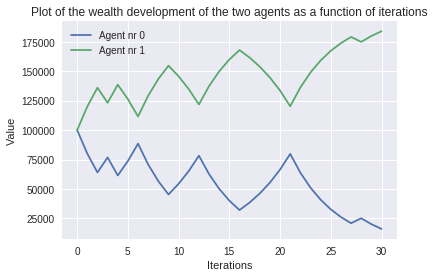

In [7]:

#plotter selve resultatet
plt.plot(people[:,0],label = "Agent nr 0")

plt.plot(people[:,1], label = "Agent nr 1")
plt.legend()
plt.ylabel("Value")
plt.xlabel("Iterations")
plt.title("Plot of the wealth development of the two agents as a function of iterations")

As we can see, one of the agents won, moreover for this model there seems to be 3 different results that are the most prevelant.
 1. The first is when one of the agents is dominating from the very beginning where he or she more or less becomes an oligark in the first set of iterations.
 2. The second is that they are more equal and the agent on top changes frequently or one of the agents is hanging by a thread, yet still manages to win enough to not fall to far off. 
 3. The third is when one agent dominates yet through the statistical anomaly, which was mentioned earlier, the losing agent  manages to make a comeback and sometimes even win the tradingbattle. 
 
Did you get any of the three scenarioes mentioned above? Write about it in the box below and try to explain what happens, if the result was one which was not specified in the 3 alternatives then try to make your own explenation of why and how this happened!


### 🔬Task:Write what happened in your system below, try to explain and convince yourself to what happened

## Making the code into a one time trading function with several agents

### Elector function


#### Current chain of action
Now that we have our tradingmodel set up **we wish to generalize it so that it can function with more agents in it**, in the first system the chain of action was 


   **See who has more money** $\rightarrow$ **Decide who's wealth to use as referance** $\rightarrow$ **Use flipCoin to decide winner** $\rightarrow$ **update values** $\rightarrow$ **New iteration**
   
   now however we need to add a few extra steps, since we have a larger number of agents we need to decide who should trade per iteration, for this we make the new function **elector** which takes inn a list of indexes and return the two who will trade. Moreover the block of code above is quite large and since we have no desire to copy and paste it in later task it should be generalized into a function called **Traderfunc**.
   
 ---
 #### New chain of action
   When this is done the new chain of action within the for loop then becomes 
   
  **Use elector to find two agents**$\rightarrow$ **Insert elected agents into traderfunction** $\rightarrow$ **update values in matrix** $\rightarrow$ **New iteration**
  
 So as we can see, a lot from the first chain of action has been packed into the function and our system can now work with more agents. However there is one thing which students should be aware of, because our system is built the way it is, the more agents you decide to put in your system, the more iterations you need to achieve the end results. This is because only a pair of agents trade each time, so when testing how the number of agents effect the system, be aware of this and try to keep the number of agents moderatly low.
 
---


### 🔬 Task: Make the elector function
 

In [8]:


def elector(listvar):
    """
    Takes a list of numbers or agents, returnes two different agents who will then trade 
    """
    # First we copy the index list so we dont modify it
    newlist = list.copy(listvar)
    
    # Then we have to pick a random index and remove it from the list
    agent1 = random.choice(newlist)
    newlist.remove(agent1)
    
    # Repeat, however now removing it is unnecessary
    agent2 = random.choice(newlist)
    return [agent1, agent2]



### Testing the elector function

We wish to test the elector function to see if it works, in the codebox under, do the following





####  🔬Tasks: 
 1. Set a number of agents between 3 and 10
 2. Fill their list with the indexes of these
 3. Use the elector function in a for loop to see if you get two random indexes as output, print them and make sure they are different!
 ---


In [9]:
agents2 = 5 # making a number of agents greater than 2

agentslist = [i for i in range(agents2)] # Making their indexes

#Printing the indexes then what the elector function outputs
print(agentslist)
for i in range(3):
    print(elector(agentslist))

[0, 1, 2, 3, 4]
[2, 4]
[4, 0]
[1, 3]


---


### Traderfunction 
Now that the elector-function is complete we will move on to the last function we need before we can build a larger tradingsystem with more than two agents. This is just a generalization of the system built earlier so take the trading for-loop from before and copy it in to the code box beneath. **Modify it so it becomes a function which takes in two values as a touple, array/list etc, then make it return the two new values it has generated after trading in the same order of indexes as when it came in**, or else you might run into a problem where the wealth changes place between the agents.

### 🔬 Task: Generalize the old system and make it into a one time trading function

In [10]:
# Here we make the general function for a one time trade between two agents

def traderfunc(people):    
    peoplenew = [0,0]



        #checking who has more wealth, he is winner
    if people[0] < people[1]:
        w = people[0] #amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[0] > people[1]:
        w = people[1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[1]
        rich = 2
        normal = 1

    firstwins = flipCoin()

    #Normal wins
    if rich != 2 and (firstwins == True):
        peoplenew[normal] = people[normal] + 0.2 * w #loser
        peoplenew[rich] = people[rich] - 0.2 * w #winner



        #Normal loses
    elif rich != 2 and (firstwins== False): 
        peoplenew[normal] = people[normal] - 0.2 * w #loser
        peoplenew[rich] = people[rich] + 0.2 * w #winner

        # they are equal and number 1 wins
    elif rich == 2 and (firstwins == True):
        peoplenew[0] = people[0] - 0.2 * w 
        peoplenew[1] = people[1] + 0.2 * w 
        
        #they are equal and number 0 wins
    elif rich == 2 and (firstwins == False):
        peoplenew[1] = people[1] - 0.2 * w 
        peoplenew[0] = people[0] + 0.2 * w 
            
            
    return peoplenew


### 🔬 Task : Test the newly coded function by applying two values as input to see if it works  

In [11]:
#create two values
value1 = value2 = 1000

#print the old values against the new ones, does it change?
print([value1,value2])
print(traderfunc([value1,value2]))

[1000, 1000]
[1200.0, 800.0]


---

## Liberalistic system 

#### What are we modeling?
So now that we have all the components we need to make a trading system with more than two agents **it's important to look at what the actuall system represents in reality.** For now what we have is a model where the agents exchange wealth with eachother without any regulation, more or less an economic libertarians dream. So in effect this means that this model would be synonumous with a strict liberal economic society. Naturally this is a simplified model, yet it captures the main essence of what such a system would look like.

This free system is also what we will use as a base in our later models where we will modify it to see how the changes impact the wealth distribution of the system.

---

#### Motivation:
Motivation for the Liberalistic system:

We want to use the most basic assumptions to create a system where agents trade with each other under no restraints to model the most "free" system possible. This resmebles the open market in its purest form and creates the base upon which studens are to create their own models later on. What we wish to observe is the devlopment of oligarchs

---

###  🔬Task:
Your task is now to stitch together the different functions to make a working model where a set of agents around 10 stong trade over a number of iterations. Our first objective then is to initiate the system, here we need a start value for our agents, the number of iterations, the number of agents, we need to create the matrix that holds the values and fill it with the starter values and lastly we need to make an index for all the agents.

In [12]:
#Here we make the most general system, with no redistibution effects

sKapital = 100000 # start capital
N = 10000 # number of iterations for the trading period
ant_agents = 10 # Number of agents present in our system

matrix = np.zeros((N,ant_agents)) # Making the system matrix of dimention (N, number of agents)

# a for loop designed to fill inn the initial conditions
for i in range(ant_agents): 
    matrix[0,i] = sKapital
    
# Furthermore we create a list of the indexes to the corresponding agents
indexagents = [i for i in range(ant_agents)] 

counter = np.zeros(ant_agents) # This is designed to count how many times the different agents won



Now that the system is initiated all that remains is to make the for loop, this for loop should do the following in order:

**Chain of action:**
 1. It should begin with updating the next values of the matrix with the old ones
 2. Then it should elect the two agents that are going to trade 
 3. It should then run the two elected agents through the trader function and update their values
 4. (optional) Add who traded to the counter 

In [13]:



# The trade loop
for i in range(N-1):
    #Making sure that the previous value for the agents who dont trade is not lost
    matrix[i+1,:] = matrix[i,:] 

    #Electing two different agents to trade, then giving them their new value
    e1,e2 = elector(indexagents)
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
    matrix[i+1,e1] = newval1
    matrix[i+1,e2] = newval2

    #Filling the counter with who won
    counter[e1] +=1
    counter[e2] +=1
   
    

### 🔬 Task: Plot the results as a traditional graph and as a heatmap

How many times the agents won [1992. 1883. 2028. 2058. 1902. 2030. 1998. 2058. 2073. 1976.]


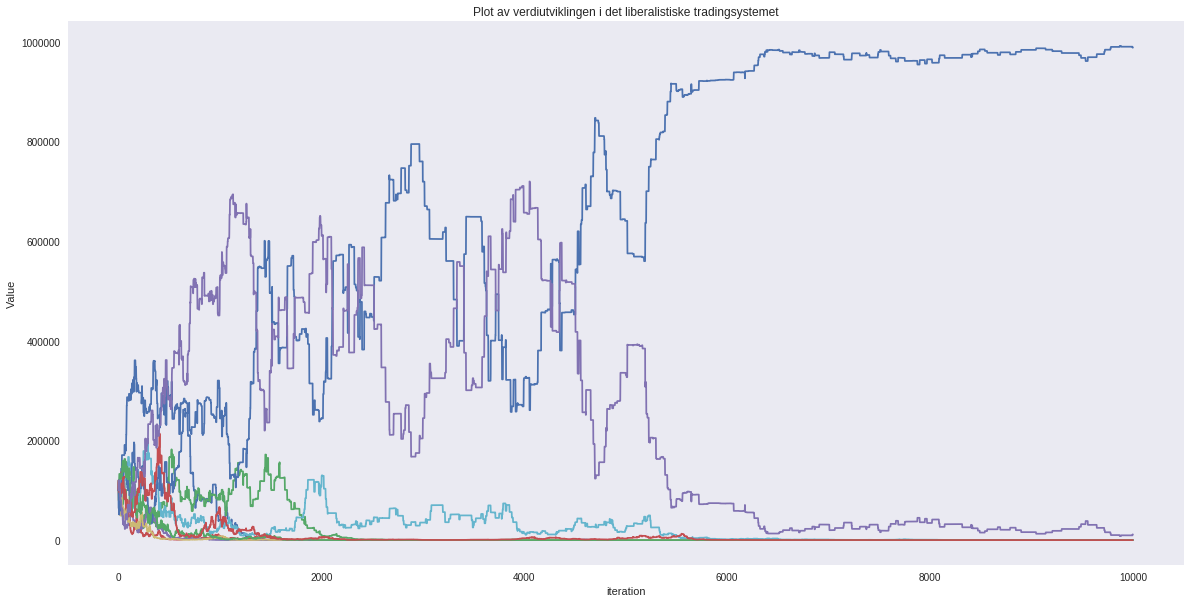

In [14]:
#Ploting the results

print(f"How many times the agents won {counter}")

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")
plt.title("Plot av verdiutviklingen i det liberalistiske tradingsystemet")

for i in range(ant_agents):
    ax.plot(matrix[:,i])

### The flaws of the traditional graph

What you hopefully should see from this is that one or more oligarks have arisen as we wanted them to do based on our model. After all what we tried to model was unrestricted capitalism, and its ultimate goal is wealth generation, which we have completely glossed over for now, and wealth accumulation, which is the main focus of this model. Moreover we can see that it is very hard to track the wealth of most of the agents when they are all more or less within the same value. Therefore we should try to explore other means of displaying the wealth development as iterations pass. One way of doing this is with a heatmap, the main thing which restricts knowledge from being easy to see in our previous plot is that we see it all from the side, however with a heatmap we can observe it from above!

Text(0.5, 1.0, 'Heatmap of how the value develops over time')

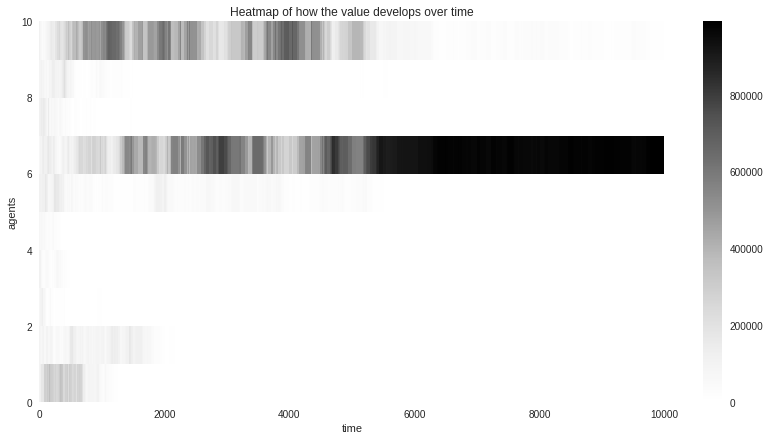

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()
plt.title("Heatmap of how the value develops over time")

The heatmap above is hopefully a little more helpful when looking at individual development as time passes, write below the different trends that you observe!

### 🔬Task: Write the different trends that you observe in the markdownbox below

**Write in this box:**

---

### 🔬Task: Write about how we can utilize the two different ways of visualizing the results, what are their strengths and weaknesses?

**Write in this box:**

---

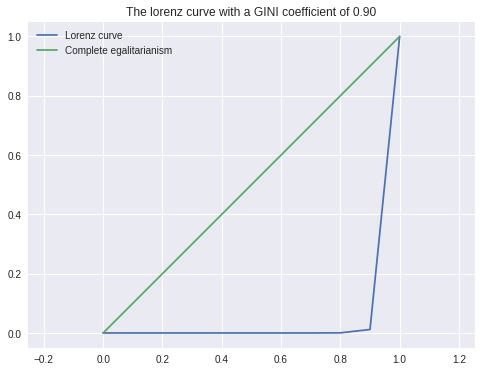

In [16]:
last_iteration = np.array(np.sort([matrix[-1,:]]))
lorenz_curve = lorenz(last_iteration)
#print(f"GINI koeffisienten er {gini(last_iteration)}")


fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()

## Expanding our model

Furtermore we wish to expand our model, we can do this in a number of ways, we could make it more unfair, where the first person who wins gets an obscene advantage over the others, or we could try to make the system a little more egalitarian. In reality an economic system where there is one person who hoards all the money is very bad for not only the economy but also the people involved in that system, after all the spice must flow. So to make it more realistic and hopefully more humane let us try to introduce a **redistribution system**. This system can come in many forms and we can be creative about it too, the different systems we suggest are, a periodic redistribution, a wealth removal for the rich or a wealth increase for the less wealthy and lastly a wealth softcap. Where you set a max roof for how much money a single agent can hold, when they pass over this roof, their money gets siphoned to the least wealthy agent to hopefully get him back in the game.




To create these new systems all we do is use the old code from before, so we should start with simply copy and pasting it in, altering it should not require many new lines of code, mostly a if test where you look at all the agents and see if they fit some crieteria should do the trick.

---

## Periodic redistribution

For the periodic redistibution we need to create a set number for when the redistibution should happen, there are many ways of doing this, however the easies way should be to just divide the number of iterations with a set number of times we wish to redistribute. How many times we redistribute is also a matter we should look in to and please do experiment with it, but as a general rule there cant be too many redistribution. After all who wants to work when they know that the money they get today might be gone tomorrow? Moreover, another argument for not having too many redistibutions is that we wont be able to see how the wealth develops onve the system gets a little "restart" from the redistribution. 

But first we need to initiate the system, this will be very similar to what you already have done, **however now we need to add a number of new lines which is,** the number of redistributions, the redistribution period, the wealth median and the percentage of the wealth that should be redistibuted from the wealthy.

Now as discussed before the amount of periods cant be too high, so start with 10 and see how this impacts the system. After all, you can come back and change this later.

### 🔬 Task: Initiate the new system with the changes mentioned

In [17]:
N = 10000
ant_agents = 30
tol = 1
sKapital = 100000


#Making the redistribution period
numRedist = 10
redistperiod = N/numRedist 

matrix = np.zeros((N,ant_agents))

for i in range(ant_agents):
    matrix[0,i] = sKapital
indexagents = [i for i in range(ant_agents)]





wmed =sKapital

percent = 0.10 #20%


Now that the system has all the necessary initial components we can make the change to our system. The new code should be similar to the old version, except now the inclution of a redistribution system will be precent.

---

###  🔬 Task: Do the following alterations to the old liberalistic trading code
 1. Write an if test to check if the iteration is a multiplum of the period of redistribution 
 2. Make a copy of the list of agent indexes
 3. create a nested for loop going over all the indexes of the agents.
 4. Check if the agent is over the wealth limit, if so then 
     1. calculate the relative portion of his or her wealth
     2. Add it to the redistribution sum
     3. Update the wealthy agents value by subtracting the amount 
     4. remove said agent from the redistribution list
 5. Create a new loop which goes overe every index in the redistribution index
 6. Update the value of the poor agents by adding an equal share of the redistribution sum

In [18]:


for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    e1,e2 = elector(indexagents)
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
    matrix[i+1,e1] = newval1
    matrix[i+1,e2] = newval2



    #here we create the wealth redistribution.
    if i % redistperiod == 0: #Checks if i is multiple of redistperiod
        underlist = [] # See who is under
        taxgainlist = [] # See who is over

        redistagentindex = list.copy(indexagents)# Lager en ny liste med indekser

        redist_sum = 0 # Denne skal holde den totale redist summen
        for j in range(ant_agents): # looper over alle agentene
            if matrix[i+1,j] > wmed: # Checks if agent is over the wealth median
                redist =percent * matrix[i+1,j] # calculates a relative portion of their wealth
                redist_sum += redist # add this to the sum
                matrix[i+1,j] = matrix[i+1,j] - redist # updates the new value with the removal of the relative portion
                redistagentindex.remove(j) # The rich agent is removed from the redist pool

                
        # Further we give each of the agents who are not wealthy an equal portion of the redist sum
        for elem in redistagentindex:
            matrix[i+1,elem] = matrix[i+1,elem] + redist_sum/len(redistagentindex)



### 🔬 Task: Plotting the results

Now that the code should be working it is important that we plot the results to see if our change to the system made a different outcome than what the liberalistic system had. **Plot it in the same manner as you did before, with a normal graph and a heatmap.**

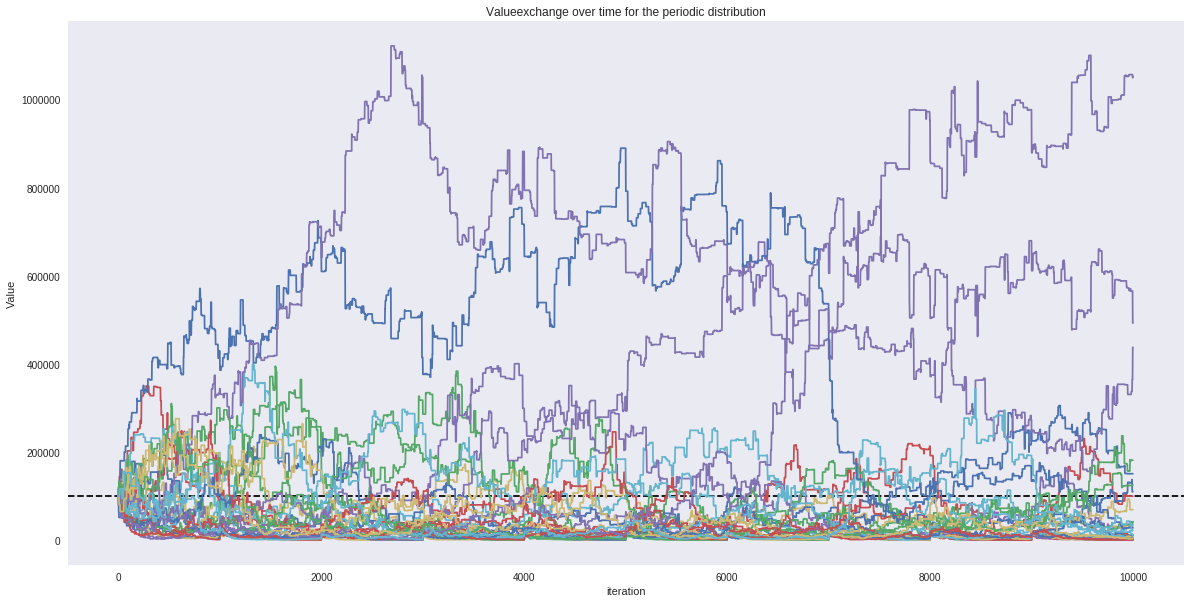

In [19]:
#Write the code for the normal graph here

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")
plt.title("Valueexchange over time for the periodic distribution")
plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])
    

    

Text(0.5, 1.0, 'Development of the distribution of value for the periodic redistribution')

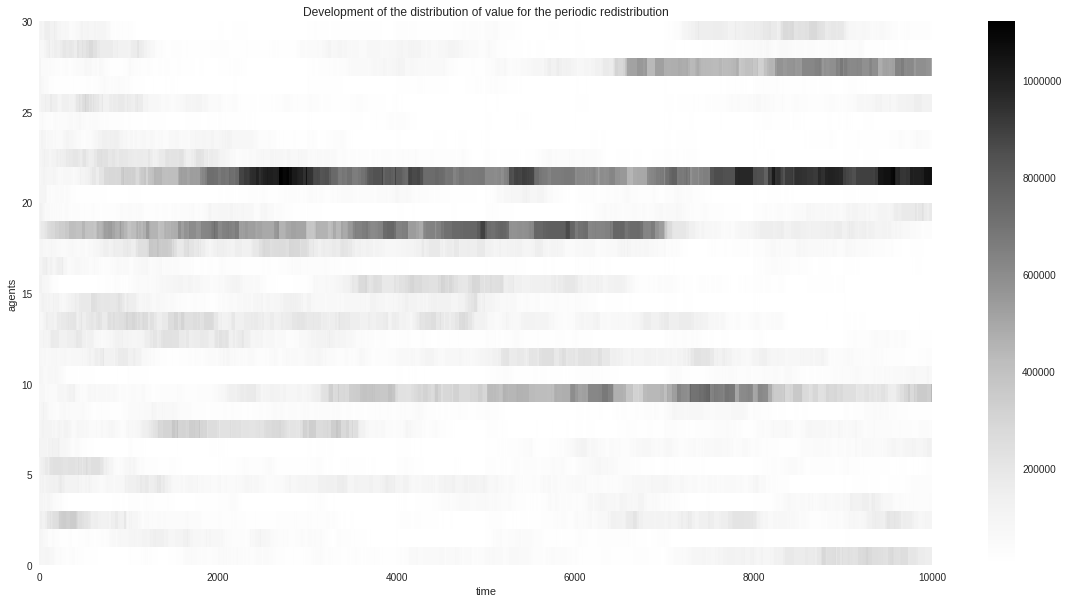

In [20]:
#Write the code for the heatmap here
fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()
plt.title("Development of the distribution of value for the periodic redistribution")

As we should see the results from the new model differs from the liberalistic model, what we can see is that at each iteration which corresponds with the redistibution period there seems to be a normalising effect where both the rich and poor are dragged towards the wealth median. This is good news as it is evidence that the redistribution actually does what it is supposed to do. 


However what is really interesting is to see if the redistribution actually helped the poor agents to get back in the game of if the soon fell into obscurity. You can try for yourself to have a lower percentage for the redistributions, but have a smaller redistibution period or you can try the opposite with a high percentage and a larger redistribution period. 


---

###  🔬 Task: Write what you observe in the box below when trying the two system suggestions in the text above

**Write in this box:**


---

###  🔬 Task: How did the changes you did impact the system, did it curtail the development of oligarks or did it have no effect?

**Write in this box:**


---

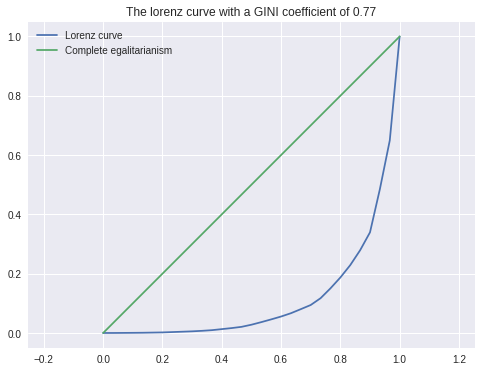

In [21]:
last_iteration = np.array(np.sort([matrix[-1,:]]))
lorenz_curve = lorenz(last_iteration)
#print(f"GINI koeffisienten er {gini(last_iteration)}")


fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()

## Universal basic income

Another way of modifying the system is with a universal basic income, universal basic income is a system where the government gives a stipend to every citizen each month, this can be done by simply adding money to each agent at a set interval. Universal basic income is not by any standard a new consept, funnily enough even one of the old roman kings had his own system of universal basic income where each roman citizen would get a sum of money if they applied.

We are however not interested in the history of UBI, but more the results. The first thing we should do is naturally initialize the system, we will need to add a few new editions to the code, like a wealth median, how many times we wish to pay the stipend, how long each period is between each stipend payout and an empty list so we can keep track of the wealth medians development as time goes by.



### 🔬 Task: Initialize the system with the new components

In [22]:
N = 10000 # Antall iterasjoner
ant_agents = 10 # Antall agenter

sKapital = 100000 # Startskapital

wmed = sKapital



#Making the redistribution period
numRedist = 10
redistperiod = N/numRedist 


wmedlist = [] # A tracker of the evoluton of the wealth median as more is distributed



matrix = np.zeros((N,ant_agents)) # Lager selve matrisen til utviklingen av verdi

for i in range(ant_agents):
    matrix[0,i] = sKapital # gir de alle en startkapital
indexagents = [i for i in range(ant_agents)] # En liste med indeksene til agentene


Again we have initialized the system, so now we need to alter the loop which determines the systems development, the new additions we have to make is first a system which calculates and stores the wealth median for each iteration so we can see how it progresses, then we need to make an if test which activates when we hit a multiplum of the redistribution period. Inside this if test we need a for loop which goes over each agent and gives them the stipend.

Moreover what is important to think about is how do we calculate the stipend, should it be a flat amount or scaling with the wealthmedian? **Given that the reason as to why we hand out money is to counteract the development of oligarks then it seems like having a scaling wealth median is the best.** If we used the flat amount it would matter less and less after each distribution, since we can say with a high probability that the wealth would accumulate to one or more oligarks.  

It is also important to look at the size of the stipend, if you give too little the agent would never be able to compete again, even with the stipend, if you give too much it would not really matter as each agent gets the same amount. Moreover the agents who really depend on this stipend to get back to fighting shape would be those with the least amount of value, so it might be worth concidering adding in a if test before distributing the money so only agents with a set amount of money or less gets the stipend. However this can be considered an extra task and strictly not necessary because it breaks with one of the core aspects of UBI, which is that **every citizen gets a stipend**.


### 🔬Task: Do the folowing changes to the original trading system
 1. Calculate and store the wealth median within the empty wealth median list
 2. Add an if test which checks if the iteration is a multiplum of the redistribution period, if yes then it should give back true and do the following
     1. Run a for loop over each of the agents, inside it add equal wealth to the individual agents

In [23]:
    

# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:] # value is transfered over from old iteration to new

    e1,e2 = elector(indexagents) # Elects two agents to trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) # Get new vaues
    matrix[i+1,e1] = newval1 # Update the new value
    matrix[i+1,e2] = newval2 # Same as above

   

    wmed = np.sum(matrix[i+1,:])/ant_agents # Update of welth median
    wmedlist.append(wmed) # Add the calculated value
  

    #here we create the universal basic income
    if i % redistperiod == 0: #Checks if i is multiple of redistperiod, if yes, SEIZE THE MEANS OF PRODUCTION BROTHER!


        percent = 1 #5%

        for j in range(ant_agents): # loop over every agent
            #if matrix[i+1,j] < percent*wmed: # check if agent is under a percentage of the wealth median
            matrix[i+1,j] = matrix[i+1,j] + wmed*0.3 # Add a set percentage of the welth median to the poor agent

    

### 🔬 Task: Plotting the results
1. Plot the results in the two following boxes, the first should contain the development of the system as a normal graph, however this will also be plotted with the development of the wealth median as a black dotted line. 

2. In the second box you should plot the value as a heatmap so you can easier see how individual agents develop.

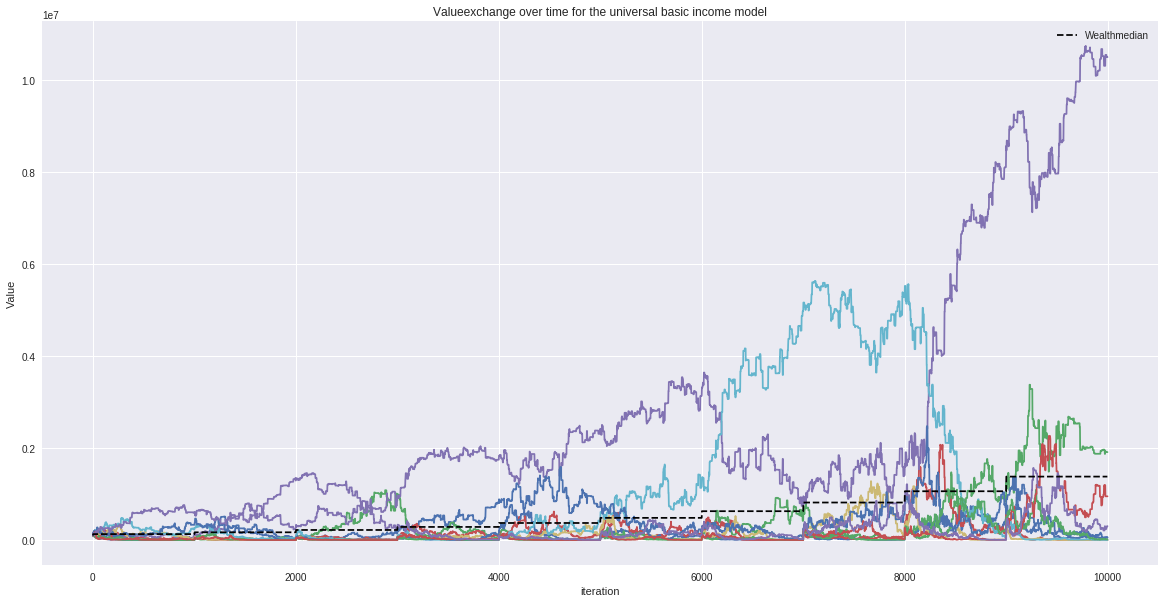

In [24]:
# Plot the system of agents here and the wealth median
    
fig, ax = plt.subplots(figsize=(20, 10)) # Plot them
plt.ylabel("Value")
plt.xlabel("iteration")
plt.plot()

for i in range(ant_agents):
    ax.plot(matrix[:,i])
plt.title("Valueexchange over time for the universal basic income model")
ax.plot(wmedlist,"--k",label = "Wealthmedian")
ax.legend()


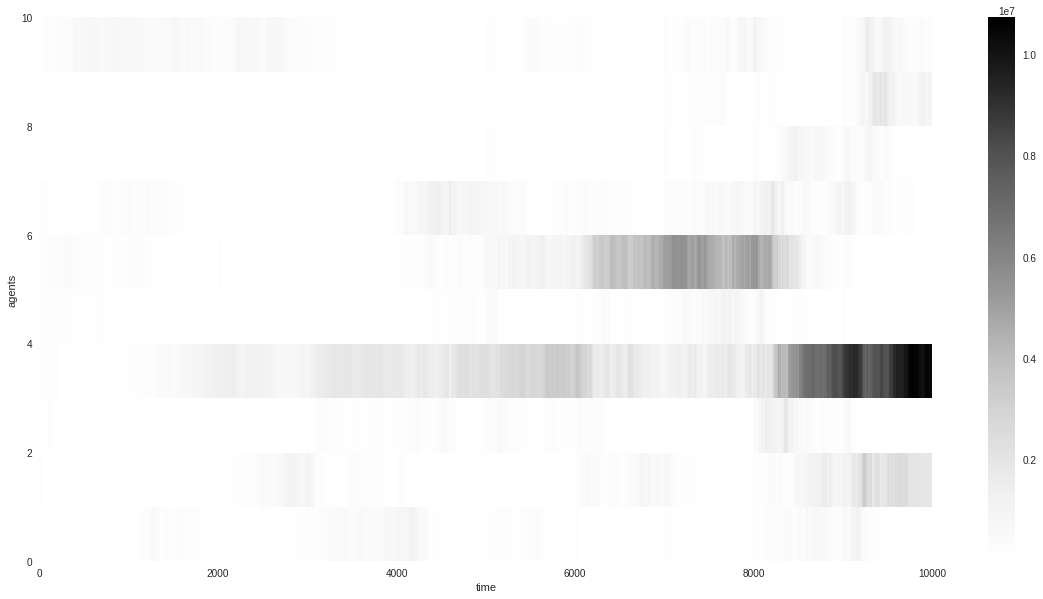

In [25]:
# Plot the heatmap of the agents here

fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

We can see from the first graph that even with a universal basic income we still have a development which results in oligarks. This might not be too suprising given that there is no real system of curtailing large amounts of wealth hoarding. Another aspect of this is that while the poor agents gets their wealth elevated so does the wealthy agents, so the gap remains virtually the same. So in effect this means that the poor agents would have a greater chance of winning against the oligark, but evidently this chance does not change by much. So what BUI does is give the poor agent a little bit of time with wealth before it eventually ends up in the hands of one or more of the oligarks. This is best seen in the first figure, where we can see that the poor agents gets an increase in money each time the stipends arrive yet after a short time most if not all of them lose what little value they got.

###  🔬 Task: Explain in the box below how this change impacted your system and write down your interpritation of the two figures you plotted.


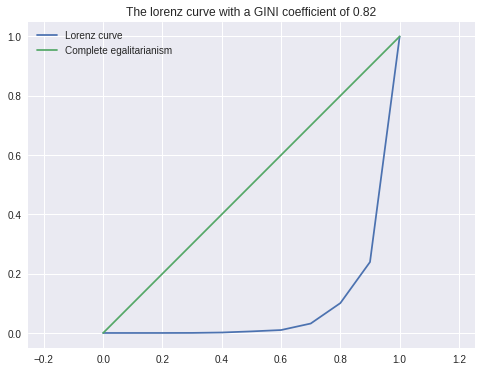

In [26]:
last_iteration = np.array(np.sort([matrix[-1,:]]))
lorenz_curve = lorenz(last_iteration)
#print(f"GINI koeffisienten er {gini(last_iteration)}")


fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()





---

## Wealth limit (softcap)

The last way we could modify our system is through an enforced wealth limit, where when the wealthy hit the wealth limit, some of their possessions gets redistributed to the agents at the lower parts of the socioeconomic spektrum. So the first thing to discuss is the very nature of the limit, is it going to be a hardcap or a softcap, where a hardcap would mean that they could never ever go over the wealth limit and a softcap would mean that they can go over, but there would be a system which activly works to bring them under again. Yet in theory if an oligark has a bit of luck and wins many times in a row he or she could theoretically exist over the wealthcap for a time, yet this is highly unlikely. Again we go to the real world to solve this problem through a thought experiment, let us imagine a state where the government has decided to implement a wealth limit with a hardcap. This would mean that if a wealthy person suddenly hits the wealthcapasity through their salery or other means, then the government would just stop that transfer and say something like "sorry, you have hit the maximum amount of allowed money, have a nice day". I can not imagine that this would go down too well with anyone, yes if the limit was arbitrarily large most people would be unaffected, yet it still seems tyrannical and it sounds like the government is more authoritarian than most would like, so perhaps a soft wealth capasity would be better? After all you are allowed to make money, even when you are over the capasity, it is just that it slowly repositions your value through some means of redistribution to a place under the wealth limit.


---
So this begs the question, how do we make this soft wealth limit? Lets start by initiating the system as we did before, the new additions to the initiation code will be a limit variable which defines the wealthroof, we will later define the wealthroof by using the limit variable as a coefficient to the wealth median. A percentage variable should also be included, we naturally need to siphon the money away from the people over the wealthlimit, this percentage should be low, **as low as 1% or even lower**. The next thing to add is a part of the optional section of this task so it can be neglected if wanted, but add 3 empty lists, these will be used to store who is at the wealth median, who is under it and lastly who is at it.



### 🔬 Task: Initiate the system with the additions to the code described over.

In [27]:
# Initiate the system here

ant_agents = 50 # number of agents
sKapital = 10000 #start capital
wmed = sKapital


# Lim is the wealthlimit and percent is the percent of wealth redistributed
lim = 5
percent = 0.01

#Making the matrix
matrix = np.zeros((N,ant_agents))


#Filling it with the inital values
for i in range(ant_agents):
    matrix[0,i] = sKapital #giving all agents start capital
    
#indexing each agent
indexagents = [i for i in range(ant_agents)] 


# Here you should make the lists that will hold how many are under, at or over the wealth median
overlim = []
underlim = []
atlim = []


Now that the system is initiated the next thing to do is let the agents trade with eachother. Again we base the new system on the old liberalistic one, the new additions to the code however will be a for loop going over each agent index, inside this you should nest an if test checking if an agent is over the wealthlimit decided by **lim $\times$ wealthmedian**. If the if test retunrs the bool True then the first thing it should do is fint the agent with the lowest amount of money, the function **numpy.argmin** should work wonders here and save you alot of unnecessary coding. Then some of the wealth of the wealthy which returned true in the test should be transfered, so this means tow lines where the poorest agent gets value added to their valuepool and the wealthy person gets their valuepool deminished.

**As for the optional part,** here you want to start by declaring 3 new variables, overlimit, underlimit and atlimit, these will begin at zero, it is important that these are declared in such a manner that they reset back to zero at the beginning of each iteration. Then a for loop which runs over every agent in that iteration+1 and a nested if test with 3 tests, these will test where on the economic spectrum the agents are, in effect are they over the wealth median, under it or direcly on it. If one of the if tests strike true then one should be added to the variable corresponding to it. This means that if the if test checking if the agents are over the wealthmedian returns true then one should be added to the variable overlimit etc. When this for loop has ended then the 3 variables, which if summed should return the same as the number of agents, should be appended to the 3 different and corresponding lists we created in the initiation section of this model. 


---

### 🔬 Task: Do the following alterations to the system as described in the paragraph over

In [28]:
# Make the trading for loop in this code box
    

# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    over, under,at = 0,0,0
    for k in matrix[i+1,:]:
        if k > wmed:
            over += 1
        elif k < wmed: 
            under +=1
        elif k == wmed:
            at += 1
    overlim.append(over)
    underlim.append(under)
    atlim.append(at)

    e1,e2 = elector(indexagents) #choosing two agents to conduct a trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) #calculating new wealth
    matrix[i+1,e1] = newval1 #updating wealth for chosen angents
    matrix[i+1,e2] = newval2

    for elem in indexagents: # loops over the agents
        if matrix[i+1,elem] >= lim* wmed: # If one of them is above 5 times the median then proceed
            poorindex = np.argmin(matrix[i+1,:]) # Finding the index of the poorest agent
            matrix[i+1,poorindex] += percent*matrix[i+1,elem] # Giving som of the wealth to the poor agent
            matrix[i+1,elem] -= percent*matrix[i+1,elem] # Removing said wealth 



Now that the system is done with its calculations it is time to visualize what we have done, first make a figure of the "normal" graph with the x axis being hte iterations and the y axis being the value. Then create the second figure which will be the heatmap of the same matrix, as discussed earlier this makes it easier to see the development of the individual agents.  

If you did the optional part aswell then create a graph which includes the 3 different lists you filled with values. 

### 🔬 Task: Create two figures a graph and a heatmap of the system, (optional) plot the 3 lists you filled in a third figure.

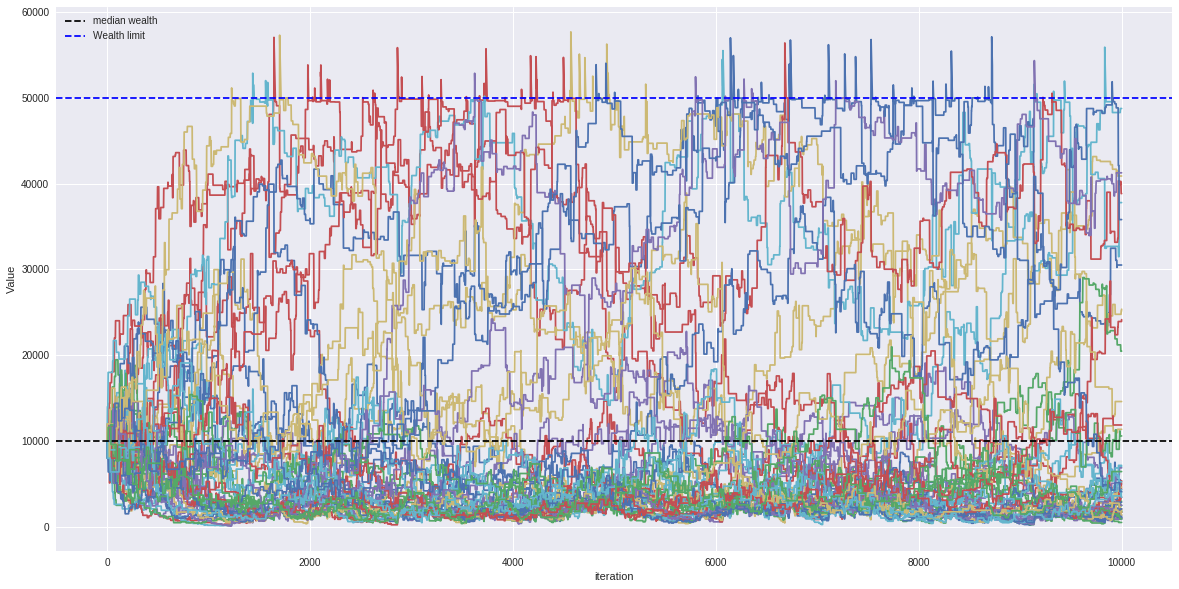

In [29]:
# Create the normal figure here

fig, ax = plt.subplots(figsize=(20, 10))
plt.ylabel("Value")
plt.xlabel("iteration")



for i in range(ant_agents):
    ax.plot(matrix[:,i])
    
ax.axhline(y = sKapital,color ="black", linestyle = "--", label = "median wealth")
ax.axhline(y = lim*sKapital,color ="blue", linestyle = "--",label = "Wealth limit")
plt.legend(loc = "upper left")

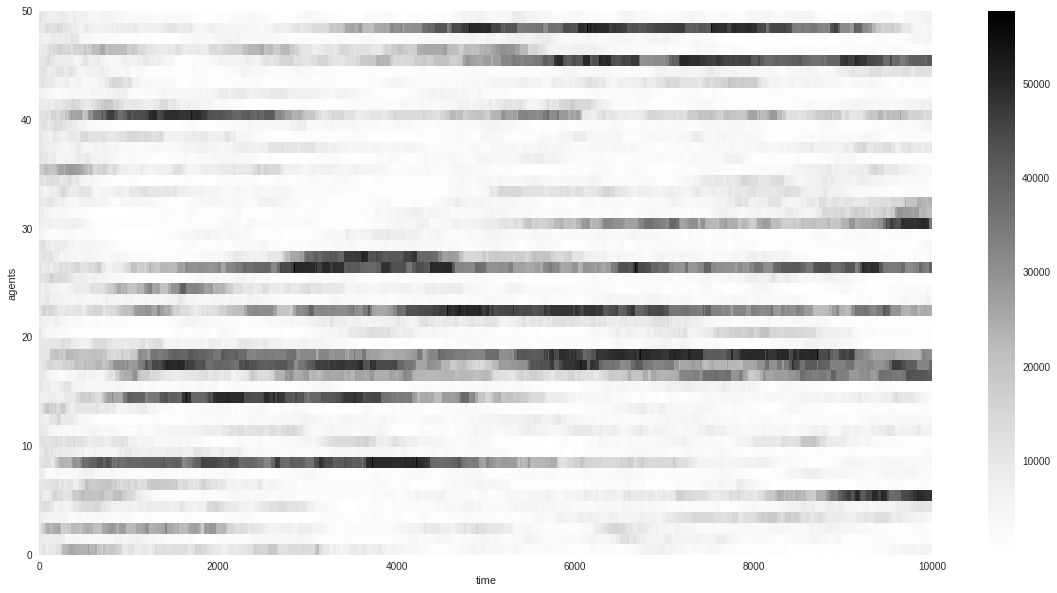

In [30]:
# Create the heatmap here

fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

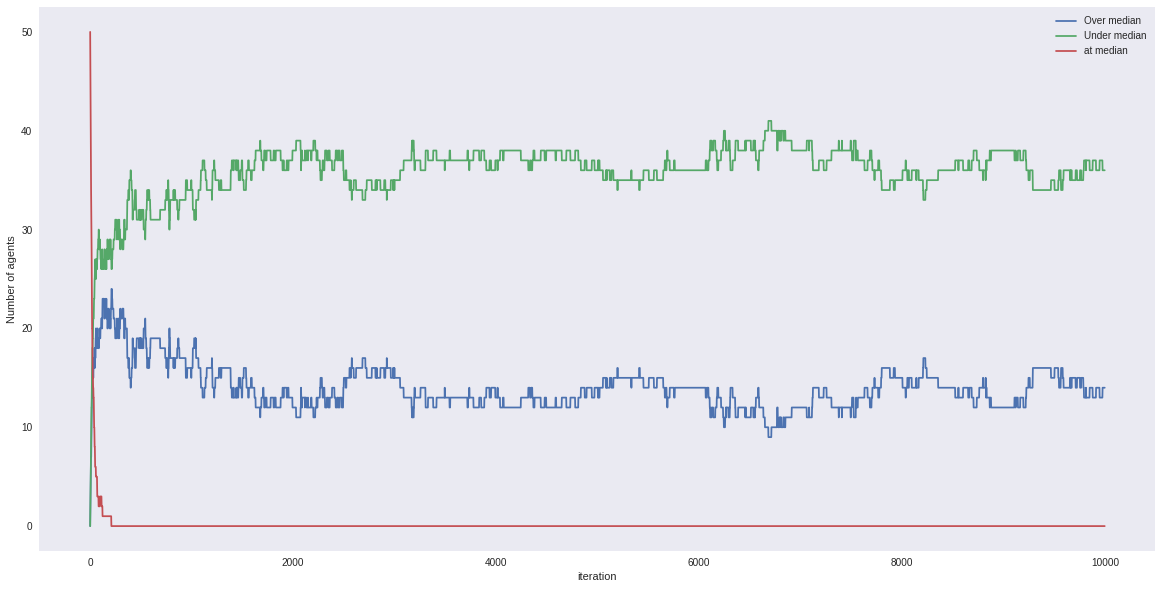

In [31]:
# (Optional) Plot the 3 lists with over, under and at median here

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Number of agents")
plt.xlabel("iteration")
ax.plot(overlim, label ="Over median")
ax.plot(underlim, label = "Under median")
ax.plot(atlim,label = "at median")
plt.legend()

As we can see this system is far more egalitarian than the first liberalistic system, this comes as no suprise given that this system actually has a system of redistribution. We can see that the liberalistic system has a clear tendency to result in one or more oligarchs, the wealthcap system however tends to have people going far more up and down, here there are clearly wealthy agents, however the divide between what is wealthy and what is poor is far less than in the liberalistic system. We see in this the wealthcap system that the wealth is distributed among far more agents who constantly trade with eachother below the wealthcap. However when an agent reaches the wealhcap we can see that he or she goes down and does not exist above it for too long. The lating results of this change is undoubtedly that this tradingbattle will continue into eternity, compare this result to the liberalistic system where the end result is one agent with all the wealth and we can with confidense assume that the changes we did on this system not only gave the desired affect but also changed the results dramatically.


Moreover when looking at the optional part we can see that there is a small divide between how many are over the median and how many are below it, we can only assume that if we put the wealth limit to a lower value that the difference between over and under would become far lower. So while this system did not produce an oligarch it did produse a far more egalitarian system.

### 🔬 Task: Write what you observed in your system below and compare it to the liberalistic system, did you expect this development to happen?

**Write in this box:**


---

### 🔬 Task: Try to change the limit coefficient and the percentage of wealth redistributed and write under how it impacts the system

**Write in this box:**


---

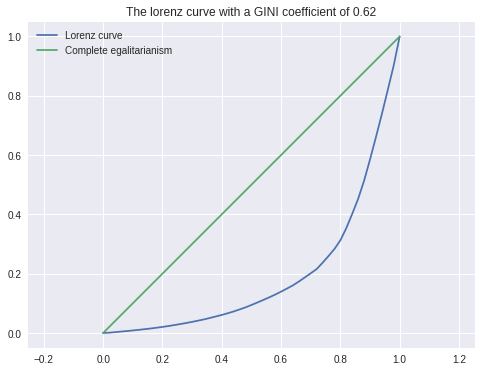

In [32]:
last_iteration = np.array(np.sort([matrix[-1,:]]))
lorenz_curve = lorenz(last_iteration)
#print(f"GINI koeffisienten er {gini(last_iteration)}")


fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()